In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks'

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, join_abundance_matrices, generate_abundance_matrix
from src.utils.archetypes import ArchetypalAnalysis
from src.utils.visualization import plot_scatter_pca, plot_3Dscatter_pca, archetypes_bar_plot, archetype_simple_plot
from src.utils.equations import arch2color, alfa2rgb, scale, color_mapper

In [3]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [1, 2, 3, 4, 5]
N_SITE = 100
RADIUS = 100

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=3)
sites, patients_ids = join_abundance_matrices(abs_log_ca_list)
pca = PCA()
pc = pca.fit_transform(sites)
pd.DataFrame(pc).to_csv("../R/pc_{}_tumors.csv".format(len(patient_ids)), header=False, index=False)

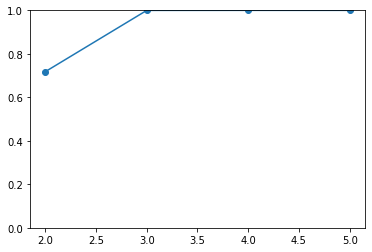

In [16]:
n_archs = list(range(2, 6))

lst_exp_var = []
for n_arch in n_archs:
    AA = ArchetypalAnalysis(n_archetypes = n_arch, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
    AA.fit(pc[:, :2])
    lst_exp_var.append(AA.explained_variance_)

plt.plot(n_archs, lst_exp_var, '-o')
plt.ylim(0, 1)
plt.show()

In [4]:
AA = ArchetypalAnalysis(n_archetypes = 3, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)

In [5]:
AA.fit_transform(pc[:, :2])

array([[ 4.25986725e+01,  7.63746321e+00],
       [-3.57425795e+01,  1.91644338e+02],
       [ 4.04975005e+01,  7.54914385e+00],
       [ 3.73686191e+01,  1.26935852e+01],
       [ 5.56362472e+01,  3.06756992e+00],
       [ 1.99595780e+01,  8.58667879e+01],
       [ 1.89576122e+01,  2.55839205e+01],
       [ 4.95597279e+01,  3.21080848e+00],
       [ 3.98771721e+01, -1.94839332e+00],
       [ 3.88025919e+01,  1.67329186e+00],
       [ 5.13618055e+01,  3.22498420e+00],
       [ 1.11581772e+00,  6.64694919e+01],
       [ 4.81234390e+01, -9.73771997e-01],
       [ 6.31065117e+01,  2.18608190e+01],
       [ 3.84568388e+01,  1.87988862e+01],
       [ 2.74011040e+01, -4.59286741e+00],
       [ 4.79617702e+01, -5.60860668e+00],
       [ 4.74968463e+01,  8.38511767e+00],
       [ 4.38438566e+01,  1.45040676e+01],
       [ 1.98470265e+01,  2.43542312e+01],
       [ 5.78507896e+01,  8.70310140e+00],
       [ 4.44592698e+01,  7.64340399e+00],
       [ 5.77009257e+01,  8.63159428e+00],
       [ 2.

In [21]:
print(AA.alfa)
print(AA.alfa.shape)
print(AA.alfa[:, 0])

[[5.80837937e-02 5.90034305e-01 2.81123925e-01 ... 3.76218092e-05
  0.00000000e+00 8.20721433e-04]
 [5.18572764e-01 2.08897009e-01 4.13791269e-01 ... 7.77729679e-01
  9.05066969e-02 7.27031067e-01]
 [4.23343442e-01 2.01068686e-01 3.05084806e-01 ... 2.22232699e-01
  9.09493514e-01 2.72148212e-01]]
(3, 500)
[0.05808379 0.51857276 0.42334344]


In [22]:
np.max(AA.alfa), np.min(AA.alfa)

(1.0000072606826778, 0.0)

In [6]:
#sites_archetype = list(map(arch2color, np.argmax(AA.alfa, axis=0)))
def get_one(v):
    return v if v <= 1.0 else 1.0
sites_archetype = [(get_one(c[0]),get_one(c[1]),get_one(c[2])) for c in AA.alfa.T]

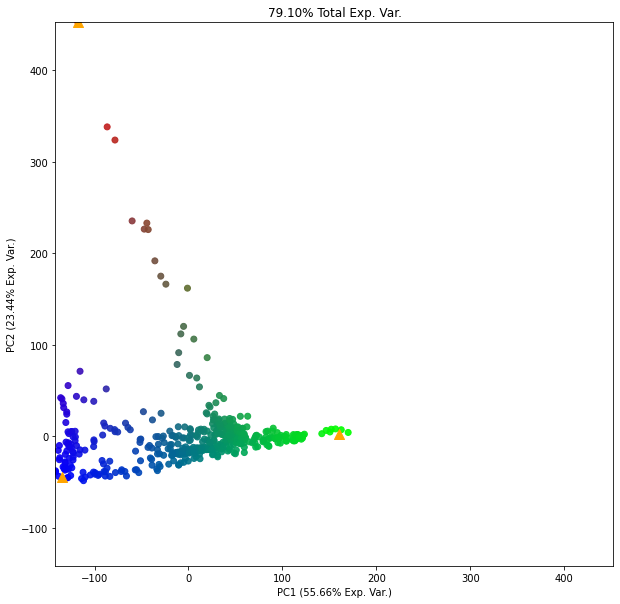

In [7]:
plot_scatter_pca(pc, pca.explained_variance_ratio_, labels=sites_archetype, original_axis=None, archetypes=AA.archetypes, cell_type=None)

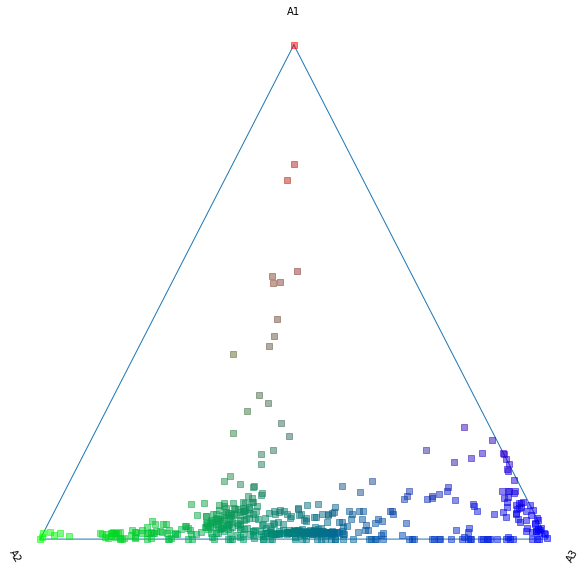

In [8]:
AA.plot_simplex(AA.alfa, plot_args={'c': sites_archetype})

In [26]:
AA.archetypes

array([[-114.77863387,  180.66474111, -131.0852976 ],
       [ 464.01801665,    4.91410608,  -45.94639914]])

In [10]:
n_comp = 2
res = np.dot(AA.archetypes.T, pca.components_[:n_comp,:])+np.mean(sites, axis=0)

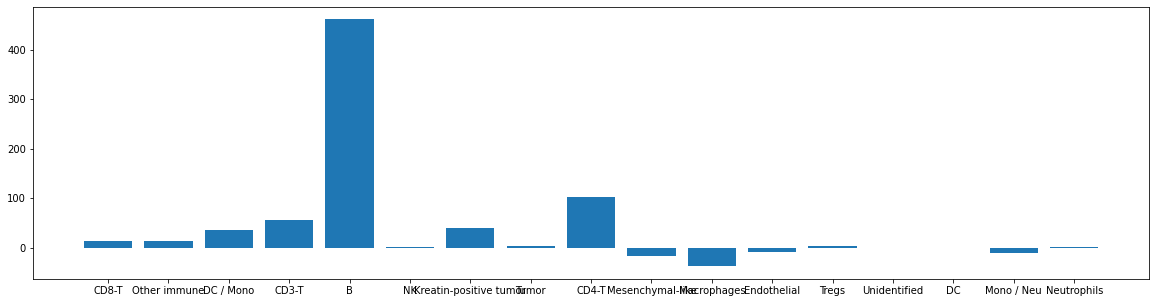

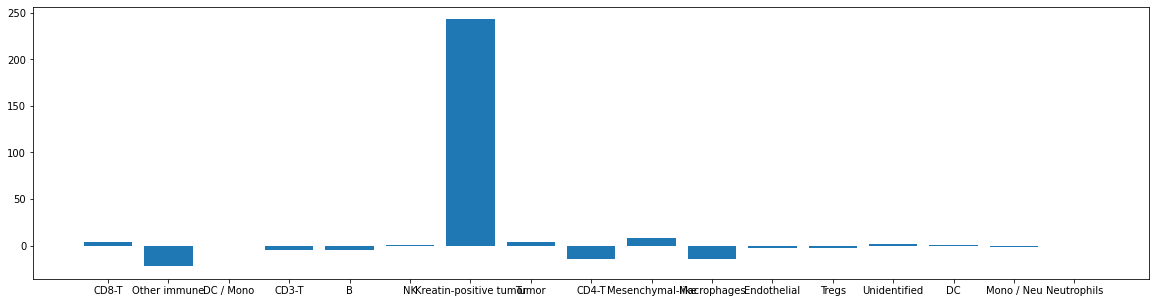

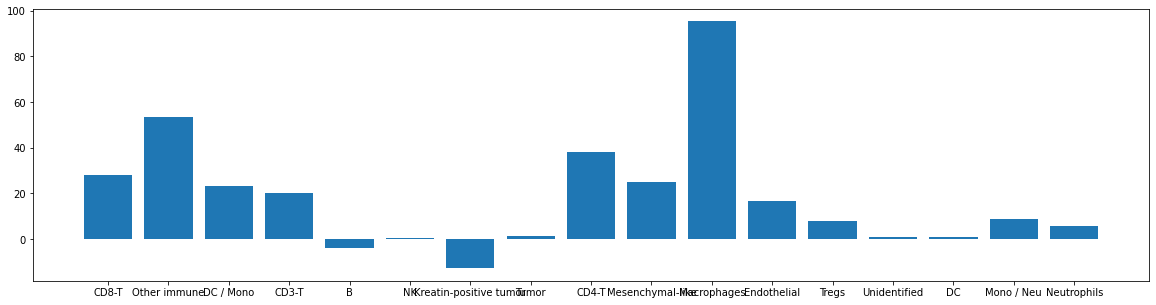

In [11]:
for a in range(3):
    plt.figure(figsize=(20, 5))
    y_pos = np.arange(len(res[a]))
    plt.bar(y_pos, res[a])
    plt.xticks(y_pos, CELL_TYPES)
    #plt.xlabel('Patient ID')
    #plt.ylabel("Relative Error")
    #plt.title("Relative misfit error for every patient")

### 3D Archetypes - All tumors

In [3]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=3)
sites, patients_ids = join_abundance_matrices(abs_log_ca_list)
pca_3d = PCA()
pc3d = pca_3d.fit_transform(sites)

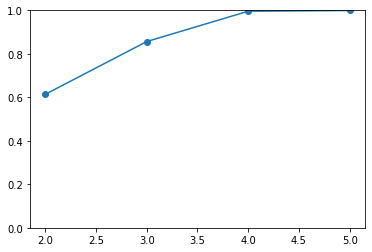

In [13]:
n_archs = list(range(2, 6))

lst_exp_var = []
for n_arch in n_archs:
    AA = ArchetypalAnalysis(n_archetypes = n_arch, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                            
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
    AA.fit(pc3d[:, :3])
    lst_exp_var.append(AA.explained_variance_)

plt.plot(n_archs, lst_exp_var, '-o')
plt.ylim(0, 1)
plt.show()

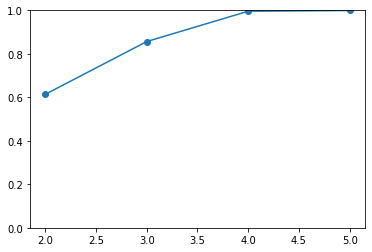

In [31]:
plt.plot(n_archs, lst_exp_var, '-o')
plt.ylim(0, 1)
plt.show()

In [4]:
AA_3D = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA_3D.fit_transform(pc3d[:, :3])

array([[ -18.04311842,   28.9224119 ,   -8.56179722],
       [ -88.76626241,  161.19594904,  -72.28044104],
       [  19.54176817,    4.43754501,  -19.77689287],
       ...,
       [ -81.8421038 ,  -20.49633652,  -21.53895982],
       [ -65.53183619,  -23.19197092,   -5.35354871],
       [-100.56939007,  -36.7133353 ,  -39.39348488]])

In [6]:
np.array([250, 98, 0]) / 255

array([0.98039216, 0.38431373, 0.        ])

In [5]:
def round2one(v):
    return v if v <= 1.0 else 1.0
color_map = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0]]).T
sites_archetype = [np.array([round2one(x) for x in color_mapper(color_map, c)/255]) for c in AA_3D.alfa.T]
p = np.array(sites_archetype)
p[p > 1]

array([], dtype=float64)

0.86% Total Exp. Var.


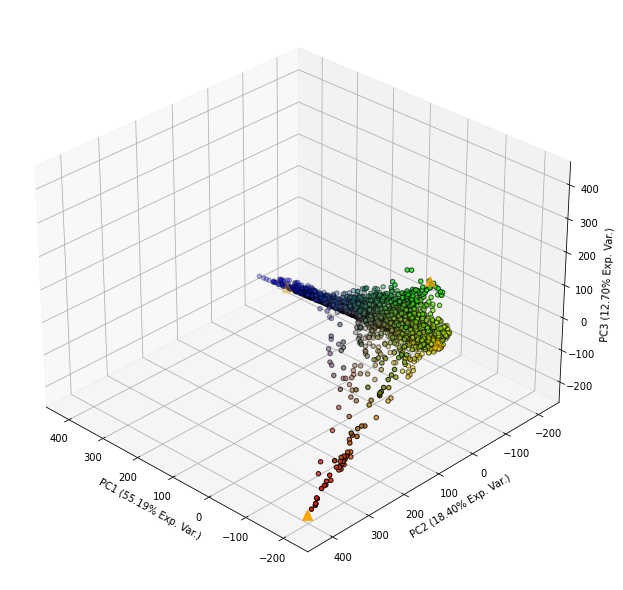

In [6]:
plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=sites_archetype, archetypes=AA_3D.archetypes)

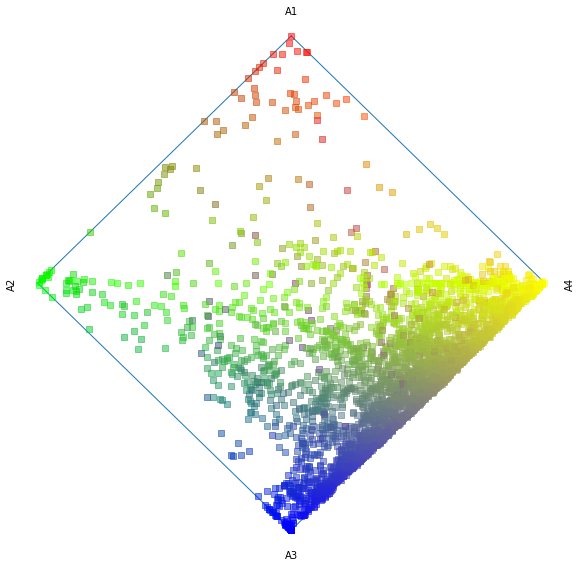

In [7]:
AA_3D.plot_simplex(AA_3D.alfa, plot_args={'c': sites_archetype})

In [8]:
n_comp = 3
res = np.dot(AA_3D.archetypes.T, pca_3d.components_[:n_comp,:])+np.mean(sites, axis=0)

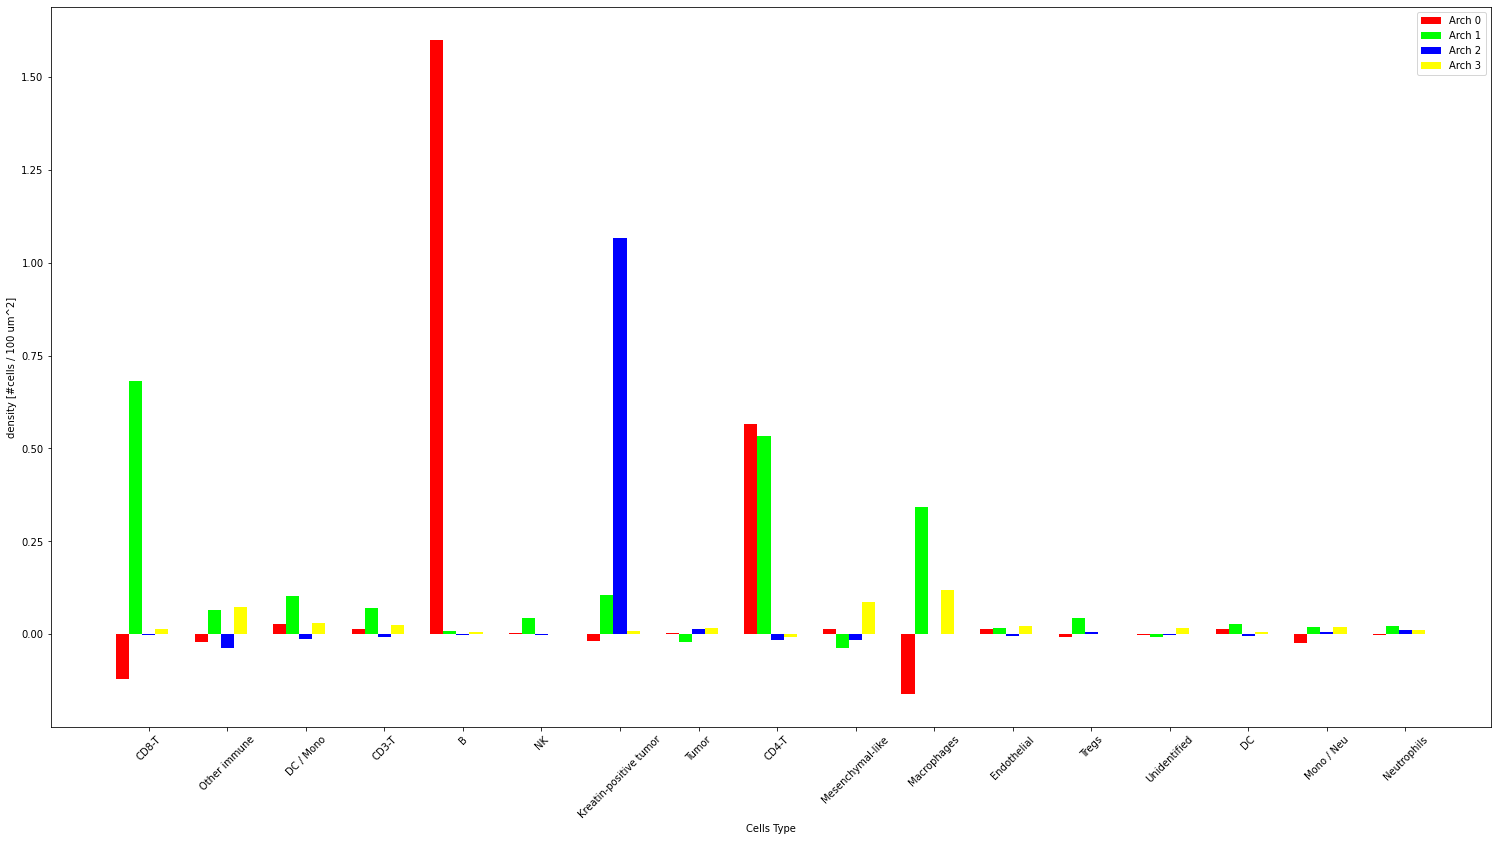

In [9]:
archetype_colors = [[1., 0., 0.], [0., 1., 0.], [0., 0., 1.], [1.0, 1.0, 0.]]
archetypes_bar_plot(res, CELL_TYPES, archetype_colors, y_axis='density', radius=RADIUS)

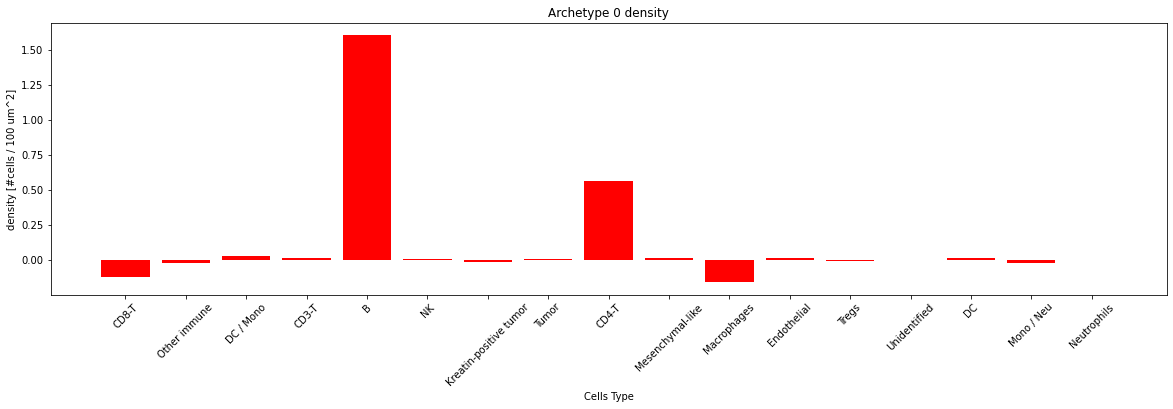

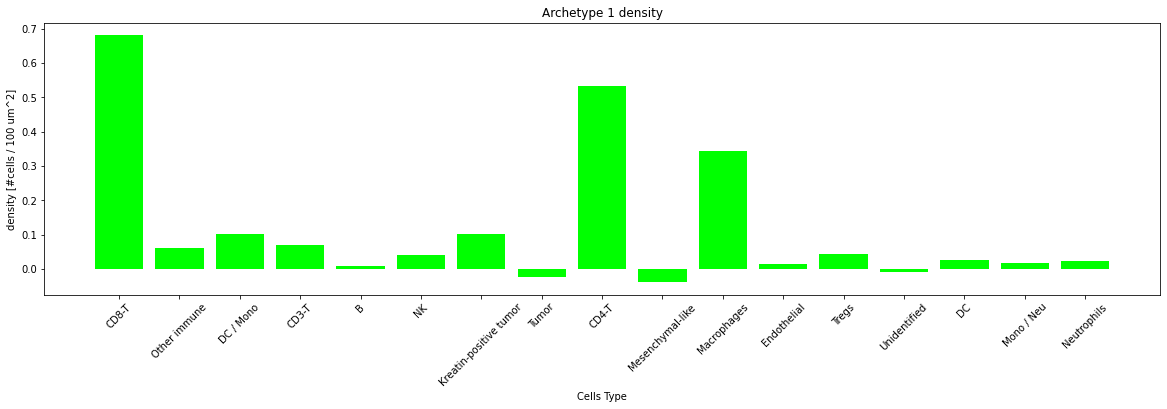

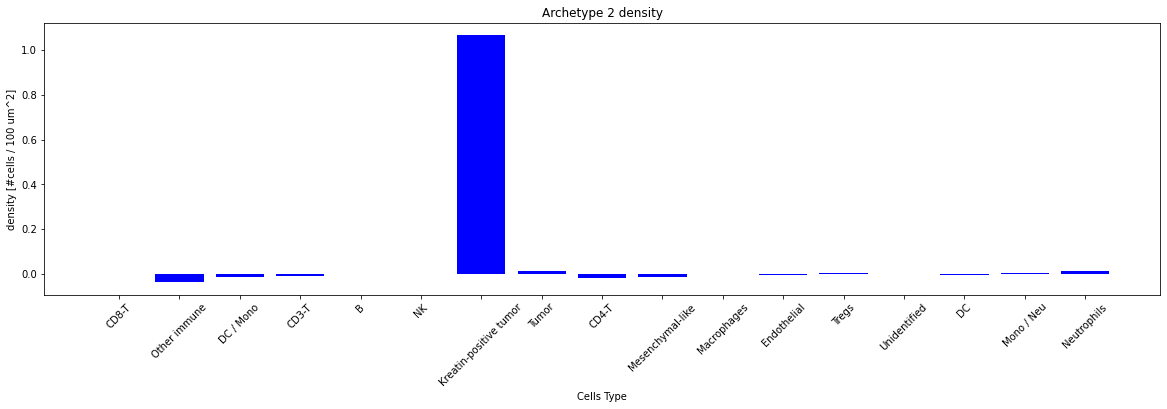

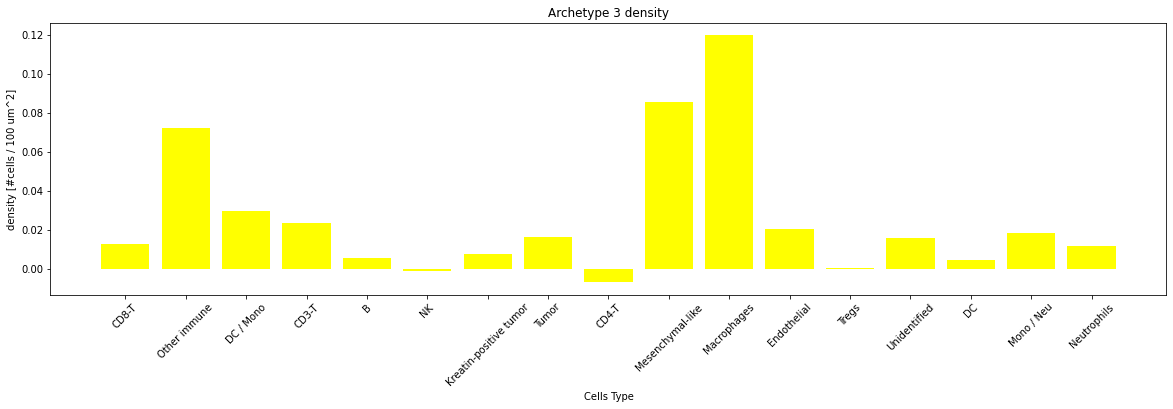

In [10]:
for a in range(4):
    archetype_simple_plot(res[a], a, archetype_colors, CELL_TYPES, y_axis='density')

In [39]:
d = np.array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1)
print(d)
new_pc = pca_3d.transform(d)
AA_3D.transform(new_pc[:, :3])

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


(array([[107.74605917, -53.77541969, -46.85291749]]),
 array([[0.01560967],
        [0.        ],
        [0.        ],
        [0.98439196]]))

In [40]:
import pickle
with open("pca_3d", "wb") as f:
    pickle.dump(pca_3d, f)

with open("AA_3D", "wb") as f:
    pickle.dump(AA_3D, f)

### Sites Archetypes

In [ ]:
AA_sites = ArchetypalAnalysis(n_archetypes = 3, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)

In [ ]:
AA_sites.fit_transform(sites)

In [ ]:
sites_archetype = list(map(arch2color, np.argmax(AA_sites.alfa, axis=0)))
AA_sites.plot_simplex(AA_sites.alfa, plot_args={'color': sites_archetype})

In [ ]:
AA_sites.plot_profile(CELL_TYPES)